# 로지스틱 회귀

In [1]:
import pandas as pd
import numpy as np

C:\Users\fdsaf\AppData\Local\Temp\ipykernel_22308\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
display(fish)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [3]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
fish_input = fish.iloc[:,1:]
fish_target = fish.iloc[:,0]

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
print(train_input.shape, test_input.shape)

(119, 5) (40, 5)


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


### 최근접 이웃 분류기의 확률 예측

In [7]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled, test_target))


0.8907563025210085
0.85


### 다중분류 문제
타깃 데이터에 2개 이상의 분류가 포함된 문제를 다중 분류라고 한다.
- 사이킷런에서는 1 과 0으로 (양성클래스, 음성클래스)로 구분하지 않고 클래스 이름으로 사용할 수 있다.
- 클래스 타깃값을 전달하면, 사이킷런 모델은 자동적으로 문자열 순으로 정렬한다.

In [8]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [9]:
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
78         Perch
155        Smelt
128         Pike
55     Whitefish
94         Perch
Name: Species, dtype: object


In [10]:
# 확률 출력
proba = kn.predict_proba(test_scaled[:])
print(np.round(proba, 3))

[[0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.333 0.    0.667 0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.333 0.    0.667 0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.

In [11]:
df = pd.DataFrame(np.round(proba, 3), columns = ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'])
df.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.0,0.0,1.000,0.0,0.000,0.0,0.0
1,0.0,0.0,0.000,0.0,0.000,1.0,0.0
2,0.0,0.0,0.000,1.0,0.000,0.0,0.0
3,0.0,0.0,0.667,0.0,0.333,0.0,0.0
4,0.0,0.0,0.667,0.0,0.333,0.0,0.0


3개의 이웃만 확인하므로 확률은 1/3, 2/3, 3/3이 전부이다. 확률이라고 하기에 부적절하다.

### 로지스틱 회귀
- 이름은 회귀이지만 분류 모델이다.
- 선형회귀와 동일하게 선형 방정식을 학습한다.

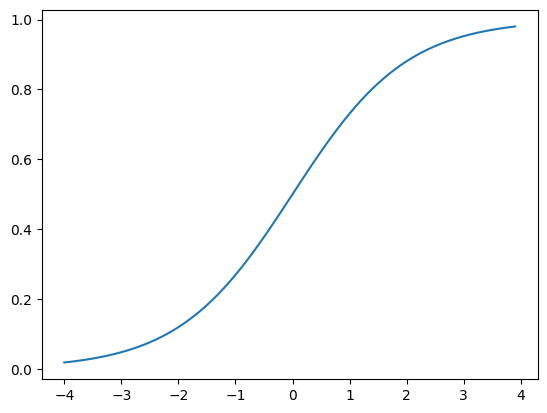

In [12]:
# 시그모이 함수 출력
import matplotlib.pyplot as plt
z = np.arange(-4, 4, 0.1)
phi = 1/(1 + np.exp(-z))
plt.plot(z, phi)


In [13]:
fish_input

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [14]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
target_bream_smelt = train_target[bream_smelt_indexes]
train_bream_smelt = train_scaled[bream_smelt_indexes]


In [15]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(train_bream_smelt, target_bream_smelt)
lg.predict(train_bream_smelt)
np.round(lg.predict_proba(train_bream_smelt),3)

array([[0.998, 0.002],
       [0.027, 0.973],
       [0.995, 0.005],
       [0.986, 0.014],
       [0.998, 0.002],
       [0.032, 0.968],
       [0.973, 0.027],
       [1.   , 0.   ],
       [0.987, 0.013],
       [0.902, 0.098],
       [0.998, 0.002],
       [0.998, 0.002],
       [0.997, 0.003],
       [0.038, 0.962],
       [1.   , 0.   ],
       [0.033, 0.967],
       [0.075, 0.925],
       [0.98 , 0.02 ],
       [0.999, 0.001],
       [0.971, 0.029],
       [0.982, 0.018],
       [0.985, 0.015],
       [0.963, 0.037],
       [0.993, 0.007],
       [0.986, 0.014],
       [0.04 , 0.96 ],
       [0.996, 0.004],
       [0.034, 0.966],
       [0.032, 0.968],
       [0.941, 0.059],
       [0.077, 0.923],
       [0.995, 0.005],
       [0.992, 0.008]])

In [16]:
fish_input

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672
